In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.sample(6)

,review,sentiment
15576,"""Any Gun Can Play"" (1967), directed by Enzo G....",positive
12321,So this guy goes into a psychiatrist's office ...,negative
46356,Dogtown and Z-Boys is a documentary about the ...,positive
37107,"THE NEXT KARATE KID, in my opinion, is an exce...",positive
15498,"This is an irredeemably stupid, boring, unimag...",negative
46176,I agree whole-heartedly with the comments so f...,positive


In [5]:
df.shape

(50000, 2)

In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.duplicated().sum()

418

In [9]:
df.loc[df.duplicated(), :]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [12]:
df.duplicated().sum()

0

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

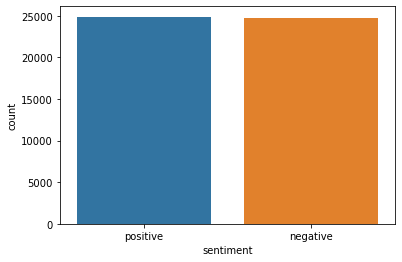

In [15]:
sns.countplot('sentiment',data=df)

In [16]:
df_train=df.iloc[:8000,:]
df_test=df.iloc[10000:,:]

In [17]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df_train['review']=df_train['review'].apply(denoise_text)

<ipython-input-17-15244f5077f9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['review']=df_train['review'].apply(denoise_text)


In [18]:
df_train['review'].shape

(8000,)

In [19]:
df_train['sentiment'].shape

(8000,)

In [20]:
lem=WordNetLemmatizer()
corpus=[]

for i in range(len(df_train)):
    review=re.sub('[^a-zA-z]',' ',df_train['review'][i])
    review=review.lower()
    review=review.split()
    review=[lem.lemmatize(j) for j in review if j not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [21]:
corpus

['one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz 

### encoding Categorical target variable using Label-Encoding

In [22]:
y=df_train['sentiment']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [23]:
y

array([1, 1, 1, ..., 0, 0, 0])

## Bag Of Words - CountVectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=20000)

x=cv.fit_transform(corpus).toarray()


In [25]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## **Split data set into separate training and test set**

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

# **Classification Algorithms**

### **1.Naive-Bayes Classifier**

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [28]:
print('Accuracy Score By Naive-Bayes test dataset : ',nb.score(x_test,y_test))

Accuracy Score By Naive-Bayes test dataset :  0.851875


<AxesSubplot:>

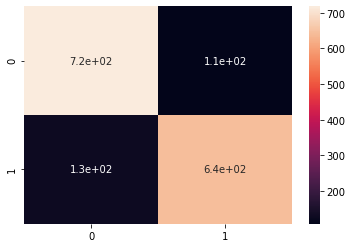

In [29]:
y_pred_nb=nb.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
cm_nb=confusion_matrix(y_test,y_pred_nb)
sns.heatmap(cm_nb,annot=True)

In [30]:
print('Classification Report of naive_bayes : \n',classification_report(y_test,y_pred_nb))

Classification Report of naive_bayes : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       826
           1       0.86      0.83      0.84       774

    accuracy                           0.85      1600
   macro avg       0.85      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600



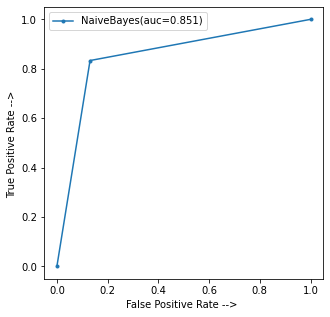

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

nb_fpr,nb_tpr,threshold = roc_curve(y_test,y_pred_nb)
nb_auc=auc(nb_fpr,nb_tpr)

plt.figure(figsize=(5,5))
plt.plot(nb_fpr,nb_tpr,marker='.',label='NaiveBayes(auc=%0.3f)' %nb_auc)
plt.xlabel('False Positive Rate --> ')
plt.ylabel('True Positive Rate --> ')

plt.legend()
plt.show()

## **Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

print('Accuracy Score By Logistics Regression : ',lr.score(x_test,y_test))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score By Logistics Regression :  0.8375


# **Logistic Regression giving highest accuracy using Count Vectorizer**

<AxesSubplot:>

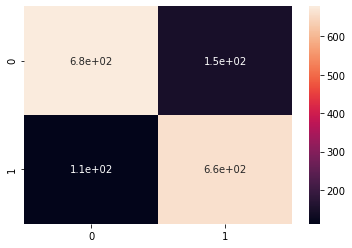

In [33]:
y_pred_lr=lr.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm_lr,annot=True)

In [34]:
print('Classification Report of lr : \n',classification_report(y_test,y_pred_lr))

Classification Report of lr : 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       826
           1       0.82      0.86      0.84       774

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600



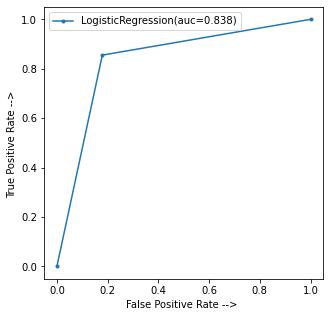

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

lr_fpr,lr_tpr,threshold = roc_curve(y_test,y_pred_lr)
lr_auc=auc(lr_fpr,lr_tpr)

plt.figure(figsize=(5,5))
plt.plot(lr_fpr,lr_tpr,marker='.',label='LogisticRegression(auc=%0.3f)' %lr_auc)
plt.xlabel('False Positive Rate --> ')
plt.ylabel('True Positive Rate --> ')

plt.legend()
plt.show()

## **KNeighborsCassifier(KNN)**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
print('Accuracy Score By KNeighborsCassifier : ',knn.score(x_test,y_test))

Accuracy Score By KNeighborsCassifier :  0.6


<AxesSubplot:>

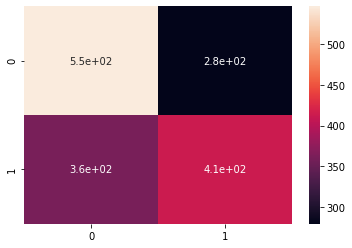

In [38]:
y_pred_knn=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm_knn,annot=True)

In [39]:
print('Classification Report of KNeighborsCassifier : \n',classification_report(y_test,y_pred_knn))

Classification Report of KNeighborsCassifier : 
               precision    recall  f1-score   support

           0       0.60      0.66      0.63       826
           1       0.60      0.53      0.56       774

    accuracy                           0.60      1600
   macro avg       0.60      0.60      0.60      1600
weighted avg       0.60      0.60      0.60      1600



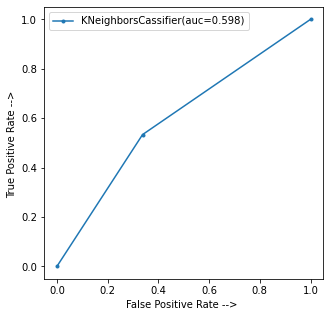

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

knn_fpr,knn_tpr,threshold = roc_curve(y_test,y_pred_knn)
knn_auc=auc(knn_fpr,knn_tpr)

plt.figure(figsize=(5,5))
plt.plot(knn_fpr,knn_tpr,marker='.',label='KNeighborsCassifier(auc=%0.3f)' %knn_auc)
plt.xlabel('False Positive Rate --> ')
plt.ylabel('True Positive Rate --> ')

plt.legend()
plt.show()

## **Support Vector Machine(SVM)**

In [41]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [42]:
print('Accuracy Score By Support Vector Machine : ',sv.score(x_test,y_test))

Accuracy Score By Support Vector Machine :  0.839375


<AxesSubplot:>

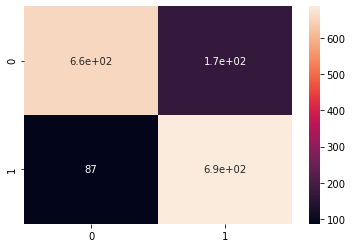

In [43]:
y_pred_sv=sv.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_sv=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(cm_sv,annot=True)

In [44]:
print('Classification Report of Support Vector Machine : \n',classification_report(y_test,y_pred_sv))

Classification Report of Support Vector Machine : 
               precision    recall  f1-score   support

           0       0.88      0.79      0.84       826
           1       0.80      0.89      0.84       774

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600



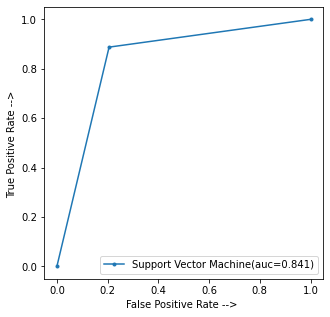

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

sv_fpr,sv_tpr,threshold = roc_curve(y_test,y_pred_sv)
sv_auc=auc(sv_fpr,sv_tpr)

plt.figure(figsize=(5,5))
plt.plot(sv_fpr,sv_tpr,marker='.',label='Support Vector Machine(auc=%0.3f)' %sv_auc)
plt.xlabel('False Positive Rate --> ')
plt.ylabel('True Positive Rate --> ')

plt.legend()
plt.show()

## **Decision Tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
# from sklearn.tree import DecisionTreeClassifier  
# dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# dt.fit(x_train, y_train)

In [48]:
print('Accuracy Score By Decision Tree : ',dt.score(x_test,y_test))

Accuracy Score By Decision Tree :  0.715


<AxesSubplot:>

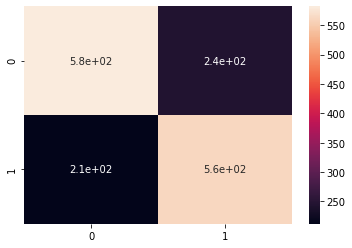

In [49]:
y_pred_dt=dt.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm_dt,annot=True)

In [50]:
print('Classification Report of Decision Tree : \n',classification_report(y_test,y_pred_dt))

Classification Report of Decision Tree : 
               precision    recall  f1-score   support

           0       0.73      0.70      0.72       826
           1       0.70      0.73      0.71       774

    accuracy                           0.71      1600
   macro avg       0.72      0.72      0.71      1600
weighted avg       0.72      0.71      0.72      1600



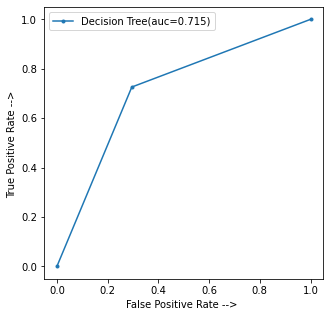

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

dt_fpr,dt_tpr,threshold = roc_curve(y_test,y_pred_dt)
dt_auc=auc(dt_fpr,dt_tpr)

plt.figure(figsize=(5,5))
plt.plot(dt_fpr,dt_tpr,marker='.',label='Decision Tree(auc=%0.3f)' %dt_auc)
plt.xlabel('False Positive Rate --> ')
plt.ylabel('True Positive Rate --> ')

plt.legend()
plt.show()

## **Random Forest**

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy')

In [53]:
# from sklearn.ensemble import RandomForestClassifier
# rf=RandomForestClassifier(criterion='gini')
# rf.fit(x_train,y_train)

In [54]:
print('Accuracy Score By Random Forest Training Dataset : ',rf.score(x_train,y_train))
print('Accuracy Score By Random Forest Test Dataset : ',rf.score(x_test,y_test))

Accuracy Score By Random Forest Training Dataset :  1.0
Accuracy Score By Random Forest Test Dataset :  0.85375


[[692 134]
 [100 674]]


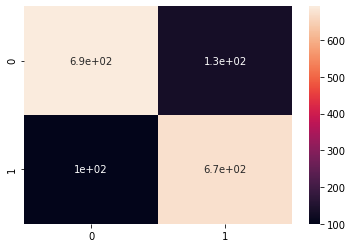

In [55]:
y_pred_rf=rf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm_rf,annot=True)
print(cm_rf)

In [56]:
print('Classification Report of Random Forest : \n',classification_report(y_test,y_pred_rf))

Classification Report of Random Forest : 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       826
           1       0.83      0.87      0.85       774

    accuracy                           0.85      1600
   macro avg       0.85      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600



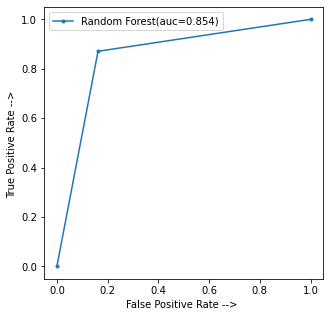

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

rf_fpr,rf_tpr,threshold = roc_curve(y_test,y_pred_rf)
rf_auc=auc(rf_fpr,rf_tpr)

plt.figure(figsize=(5,5))
plt.plot(rf_fpr,rf_tpr,marker='.',label='Random Forest(auc=%0.3f)' %rf_auc)
plt.xlabel('False Positive Rate --> ')
plt.ylabel('True Positive Rate --> ')

plt.legend()
plt.show()

## **Using TF-IDF(Term Frequenct and Inverse Document Frequency)**

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=25000)
x_tfid=tfidf.fit_transform(corpus).toarray()

In [59]:
# saving tfidf for later use
import pickle
filename = 'tfidf_ IMDB_Movie_Reviews11.sav'
pickle.dump(tfidf, open(filename, 'wb'))                                                                                 

In [60]:
from sklearn.model_selection import train_test_split
x_tfid_train,x_tfid_test,y_tfid_train,y_tfid_test=train_test_split(x_tfid,y,test_size=0.20,random_state=0)

In [61]:
y_tfid_train

array([0, 0, 1, ..., 0, 1, 1])

In [62]:
from sklearn.naive_bayes import MultinomialNB
nb_tfid=MultinomialNB()
nb_tfid.fit(x_tfid_train,y_tfid_train)

MultinomialNB()

In [63]:
print('Accuracy Score By Naive-Bayes_tfid : ',nb_tfid.score(x_tfid_test,y_tfid_test))

Accuracy Score By Naive-Bayes_tfid :  0.865


In [64]:
from sklearn.linear_model import LogisticRegression
lr_tfid=LogisticRegression()
lr_tfid.fit(x_tfid_train,y_tfid_train)

print('Accuracy Score By Logistics Regression_tfid : ',lr_tfid.score(x_tfid_test,y_tfid_test))

Accuracy Score By Logistics Regression_tfid :  0.865625


[[684 142]
 [ 73 701]]


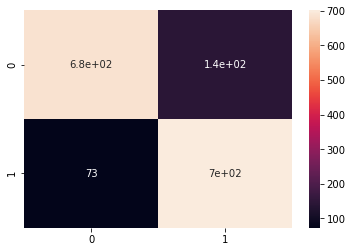

In [65]:
y_pred_lr_tfid=lr_tfid.predict(x_tfid_test)
from sklearn.metrics import confusion_matrix
cm_lr_tfid=confusion_matrix(y_tfid_test,y_pred_lr_tfid)
sns.heatmap(cm_lr_tfid,annot=True)
print(cm_lr_tfid)

In [66]:
print('Classification Report of Logistics Regression_tfid : \n',classification_report(y_tfid_test,y_pred_lr_tfid))

Classification Report of Logistics Regression_tfid : 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       826
           1       0.83      0.91      0.87       774

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_tfid=RandomForestClassifier(criterion='entropy')
rf_tfid.fit(x_tfid_train,y_tfid_train)
print('Accuracy Score By Random Forest_tfid : ',rf_tfid.score(x_tfid_test,y_tfid_test))

Accuracy Score By Random Forest_tfid :  0.851875


In [68]:
from sklearn.svm import SVC
sv_tfid=SVC()
sv_tfid.fit(x_tfid_train,y_tfid_train)
print('Accuracy Score By Support Vector Machine_tfid : ',sv_tfid.score(x_tfid_test,y_tfid_test))

Accuracy Score By Support Vector Machine_tfid :  0.873125


In [69]:
# saving svm for later use
import pickle
filename = 'SVM_tfidf_ IMDB_Movie_Reviews11.sav'
pickle.dump(sv_tfid, open(filename, 'wb'))

[[695 131]
 [ 72 702]]


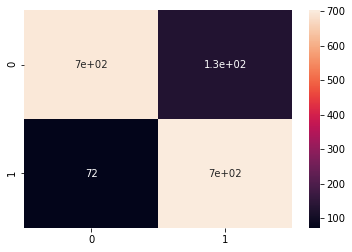

In [70]:
y_pred_sv_tfid=sv_tfid.predict(x_tfid_test)
from sklearn.metrics import confusion_matrix
cm_sv_tfid=confusion_matrix(y_tfid_test,y_pred_sv_tfid)
sns.heatmap(cm_sv_tfid,annot=True)
print(cm_sv_tfid)

In [71]:
print('Classification Report of Support Vector Machine_tfid : \n',classification_report(y_tfid_test,y_pred_sv_tfid))

Classification Report of Support Vector Machine_tfid : 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       826
           1       0.84      0.91      0.87       774

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.88      0.87      0.87      1600



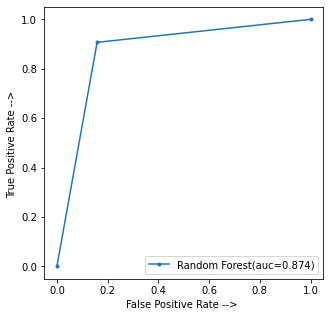

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

sv_tfid_fpr,sv_tfid_tpr,threshold = roc_curve(y_tfid_test,y_pred_sv_tfid)
sv_tfid_auc=auc(sv_tfid_fpr,sv_tfid_tpr)

plt.figure(figsize=(5,5))
plt.plot(sv_tfid_fpr,sv_tfid_tpr,marker='.',label='Random Forest(auc=%0.3f)' %sv_tfid_auc)
plt.xlabel('False Positive Rate --> ')
plt.ylabel('True Positive Rate --> ')

plt.legend()
plt.show()

### ** > Support Vector Machine giving highest accuracy 88% using Tfidf Vectorizer**

In [74]:
from sklearn.model_selection import RandomizedSearchCV

C = [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)]

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

degree = [int(x) for x in np.linspace(5, 20,6)]


random_grid = {'C': C,
               'kernel': kernel,
               'degree': degree,
              'gamma':['scale', 'auto']}
print(random_grid)

{'C': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [5, 8, 11, 14, 17, 20], 'gamma': ['scale', 'auto']}


In [75]:
sv=SVC()

In [76]:
sv=SVC()
sv_randomcv=RandomizedSearchCV(estimator=sv,param_distributions=random_grid,n_iter=30,cv=2,verbose=2,
                               random_state=100)

In [77]:
sv_randomcv.fit(x_tfid_train,y_tfid_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV] END ........C=16, degree=20, gamma=scale, kernel=linear; total time= 8.4min
[CV] END ........C=16, degree=20, gamma=scale, kernel=linear; total time= 8.1min
[CV] END ............C=2, degree=14, gamma=auto, kernel=poly; total time=11.0min
[CV] END ............C=2, degree=14, gamma=auto, kernel=poly; total time=10.7min
[CV] END .............C=6, degree=5, gamma=scale, kernel=rbf; total time=12.7min
[CV] END .............C=6, degree=5, gamma=scale, kernel=rbf; total time=16.7min
[CV] END ............C=10, degree=5, gamma=auto, kernel=poly; total time= 5.8min
[CV] END ............C=10, degree=5, gamma=auto, kernel=poly; total time= 5.4min
[CV] END ..........C=10, degree=20, gamma=scale, kernel=poly; total time= 5.4min
[CV] END ..........C=10, degree=20, gamma=scale, kernel=poly; total time=26.5min
[CV] END ...........C=6, degree=8, gamma=auto, kernel=linear; total time= 4.6min
[CV] END ...........C=6, degree=8, gamma=auto, k

RandomizedSearchCV(cv=2, estimator=SVC(), n_iter=30,
                   param_distributions={'C': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20],
                                        'degree': [5, 8, 11, 14, 17, 20],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=100, verbose=2)

In [78]:
sv_randomcv.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 5, 'C': 6}

In [84]:
from sklearn.svm import SVC
sv_r=SVC(kernel= 'rbf', gamma='scale', degree= 5, C=6)
sv_r.fit(x_tfid_train,y_tfid_train)
print('Accuracy Score By Support Vector Machine_tfid : ',sv_r.score(x_tfid_test,y_tfid_test))

Accuracy Score By Support Vector Machine_tfid :  0.875625


[[700 126]
 [ 73 701]]


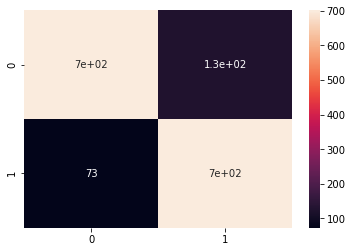

In [85]:
y_pre=sv_r.predict(x_tfid_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_tfid_test,y_pre)
sns.heatmap(cm,annot=True)
print(cm)

In [86]:
print('Classification Report of Support Vector Machine_tfid : \n',classification_report(y_tfid_test,y_pre))

Classification Report of Support Vector Machine_tfid : 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       826
           1       0.85      0.91      0.88       774

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



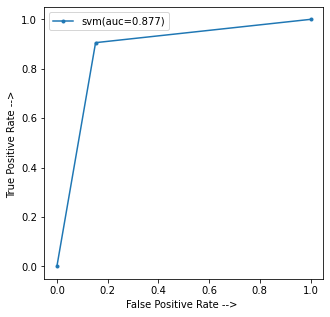

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

sv_fpr,sv_tpr,threshold = roc_curve(y_tfid_test,y_pre)
sv_auc=auc(sv_fpr,sv_tpr)

plt.figure(figsize=(5,5))
plt.plot(sv_fpr,sv_tpr,marker='.',label='svm(auc=%0.3f)' %sv_auc)
plt.xlabel('False Positive Rate --> ')
plt.ylabel('True Positive Rate --> ')

plt.legend()
plt.show()

In [79]:
sv_randomcv

RandomizedSearchCV(cv=2, estimator=SVC(), n_iter=30,
                   param_distributions={'C': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20],
                                        'degree': [5, 8, 11, 14, 17, 20],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=100, verbose=2)

In [80]:
sv_randomcv.best_estimator_

SVC(C=6, degree=5)

In [81]:
best_random_grid=sv_randomcv.best_estimator_

In [ ]:
from sklearn.model_selection import GridSearchCV

C = [int(x) for x in np.linspace(start = 3, stop = 20, num = 10)]

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

degree = [int(x) for x in np.linspace(5, 20,6)]

gamma= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

parameters = {'C': C,
               'kernel': kernel,
               'degree': degree,
              'gamma':gamma}
grid_search = GridSearchCV(estimator = sv_tfid,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(x_tfid_train,y_tfid_train)

In [ ]:
grid_search.best_params_

## Using Word2Vec

In [ ]:
from gensim.models import Word2Vec
w2v = Word2Vec(corpus, min_count=1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=25000)
x_tfid=tfidf.fit_transform(corpus).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_w2v_train,x_w2v_test,y_w2v_train,y_w2v_test=train_test_split(w2v,y,test_size=0.20,random_state=0)